In [1]:
from Code.preprocess import *
from Code.plotting import *

### Process allinfo file
Assign cell type and brain region to every read. For this we use the allinfo_addct() function from the preprocess_scisorseqr.py scripts. This uses the allinfo file outputted by IsoQuant, the SR adata file, and the CIDmap. From the SR adata file we extract the labels so we know which cell type and region of each cell. The CIDmap file indicates which barcodes belong to which cell ID. 

All cells are labeled using CT_REGION. 


In [2]:
fn_allinfo = 'Data/allinfo_ds.gz' 
fn_CIDmap = 'Data/sample1_barcodeToPos.CellID_ds.tsv.gz' 
fn_adata = 'Data/sample1_cellbin_adjusted.h5ad' 
allinfo_addct(fn_allinfo, fn_CIDmap, fn_adata) 

Number of reads:
446520
Number of reads with at least 1 exon in intron chain:
372190


  0%|          | 0/372190 [00:00<?, ?it/s]

Number of reads overlapping segmented cells:
226461
Number of reads with label:
162445


### Create auxiliary files

The files are needed by Scisorseqr for every dataset
   - Iso-IsoID.csv: assigns an ID to every isoform
   - NumIsoPerCluster: indicates how often each isoform was counted per cell type

In [3]:
fn_allinfo = 'Data/allinfo_ds.filtered.labeled.gz' 
output_dir = 'Data/scisorseqr/demo/'
create_auxiliary_files(fn_allinfo, output_dir)


Number of reads:
162445
Number of reads with isoform assigned:
105769


### Running scisorseqr

We run scisorseqr for different groups of cells (either all cells or a specific cell type) and brain regions (e.g. the broad brain regions, cortical layers, or hippocampal subregions). For every test (e.g. All cells in the hippocampus), we created celltype files to define the pairwise tests that scisorseqr has to perform. These files contain 4 columns:
1. Name of first group (e.g. CA1_ML)
2. Labels of the reads considered to be in this group (other_CA1_ML,ExciteNeuron_CA1_ML,InhibNeuron_CA1_ML,Astro_CA1_ML,Oligo_CA1_ML)
3. Name of the second group (e.g. CA2)
4. Labels of the reads considered to be in this group (ExciteNeuron_CA2,other_CA2,InhibNeuron_CA2,Astro_CA2)

For more information about scisorseqr we refer to the original GitHub (https://github.com/tilgnerlab/scisorseqr)

Below is the example code which can be ran in the terminal to run scisorseqr on all celltype files:

```bash
cd 'Demo/Data/scisorseqr/demo/'
mkdir res_scisorseqr
cd res_scisorseqr

# Loop over all regions and celltypes
files=$(ls ../../ct_files)
for file in $files; do
    echo "Filename: $file"
    mkdir $file
    cd $file
    cp ../../../ct_files/$file .

    # Copy files to the IsoQuantOutput folder since this is what scisorseqr automatically uses as input
    mkdir IsoQuantOutput
    cp ../../Iso-IsoID.csv IsoQuantOutput/
    cp ../../NumIsoPerCluster IsoQuantOutput/ 

    # Run scisorseqr
    Rscript -e 'library(scisorseqr); DiffSplicingAnalysis("'"$file"'")'
    echo "Finished processing $file"
    echo 
    echo

    cd ../
done
```

NOTE: Due to the small size of the downsampled allinfo file, not all comparisons might work.

### Plot results in a heatmap

See some example plots below. 

In [4]:
allinfo = pd.read_csv('Data/allinfo_ds.filtered.labeled.gz',
                     index_col=0, header=None, sep='\t')
allinfo.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
ec4fe453-a962-419a-b961-34de928d482e_34_1753_+,ENSMUSG00000025903.15,other_Midbrain,ATACAGCTTGAACTGCATTCCGCGG,TGCCTCCCAC,;%;chr1_4878206_4878677_+;%;chr1_4878710_48988...,NoTSS,NoPolyA,;%;chr1_4878052_4878205_+;%;chr1_4878678_48787...,known,8,ENSMUST00000027036.11,protein_coding
1daab6bf-00b9-46b1-ab4c-3e38c43ce7c5_31_2557_+,ENSMUSG00000025903.15,other_Midbrain,AGTACGTGACCCAGGGTTGTCGTAG,TACCGGTCCA,;%;chr1_4878206_4878677_+;%;chr1_4878710_48988...,NoTSS,chr1_4916963_4916963_+,;%;chr1_4878121_4878205_+;%;chr1_4878678_48787...,known,8,ENSMUST00000027036.11,protein_coding
5e9a5ec1-4c11-4f4c-9fde-b22b8b4ef75e_0_2538_-,ENSMUSG00000025903.15,ExciteNeuron_CA3_ML,CTGGAAGTACTGCCTAAGACACAAG,CTAAGAGGGA,;%;chr1_4878206_4878677_+;%;chr1_4878710_48988...,NoTSS,chr1_4916963_4916963_+,;%;chr1_4878132_4878205_+;%;chr1_4878678_48787...,known,8,ENSMUST00000027036.11,protein_coding
f227cc3d-3334-4029-a137-4c13317dd618_34_2230_+,ENSMUSG00000025903.15,other_L4,GATCTATGTCTTACCACTTTAAACG,TCGAAACTGC,;%;chr1_4907298_4909609_+;%;chr1_4909712_49111...,NoTSS,chr1_4916963_4916963_+,;%;chr1_4907278_4907297_+;%;chr1_4909610_49097...,known,3,ENSMUST00000027036.11,protein_coding
de5497de-77cd-4d78-911f-aa18af555008_10_2065_-,ENSMUSG00000025903.15,ExciteNeuron_CA1_ML,ATGAGCGACTATGCGGTGGCTGAGC,TCCTCGCATCG,;%;chr1_4911356_4915185_+,NoTSS,chr1_4916963_4916963_+,;%;chr1_4911187_4911355_+;%;chr1_4915186_49169...,known,1,ENSMUST00000027036.11,protein_coding


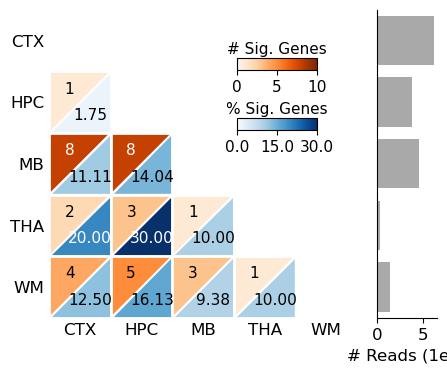

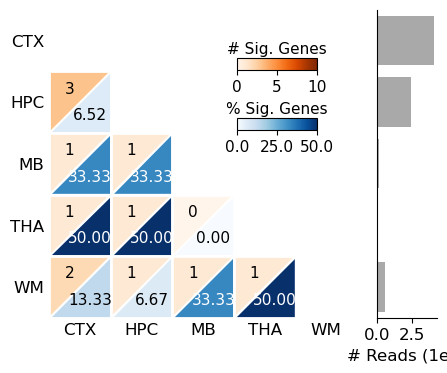

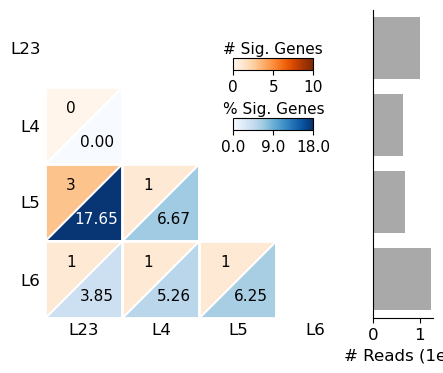

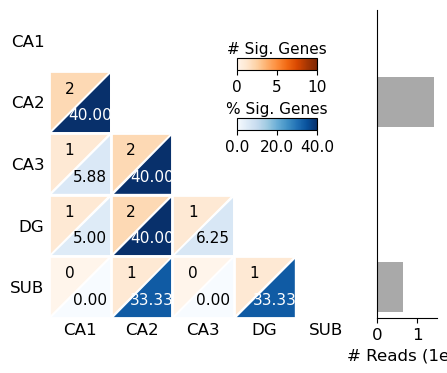

In [5]:
# Used to rename the regions in the plot
region_map = {
    'Cortex': 'CTX',
    'HPC': 'HPC',
    'Midbrain': 'MB',
    'Thalamus': 'THA',
    'WM': 'WM'
}

plot_heatmap(input_dir='Data/scisorseqr/', 
             dataset='demo', 
             region='All', 
             celltype='All', 
             allinfo=allinfo,
             region_map=region_map, region_map2=region_map
            )

plot_heatmap(input_dir='Data/scisorseqr/', 
             dataset='demo', 
             region='All', 
             celltype='ExciteNeuron', 
             allinfo=allinfo,
             region_map=region_map, region_map2=region_map
            )

plot_heatmap(input_dir='Data/scisorseqr/', 
             dataset='demo', 
             region='cortex', 
             celltype='ExciteNeuron', 
             allinfo=allinfo,
             region_map=None, region_map2=None
            )

region_map = {
    'CA1': 'CA1',
    'CA2': 'CA2',
    'CA3': 'CA3',
    'DG': 'DG',
    'Subiculum': 'SUB'
}

region_map2 = {
    'CA1_ML': 'CA1',
    'CA2': 'CA2',
    'CA3_ML': 'CA3',
    'DG_ML': 'DG',
    'Subiculum': 'SUB'
}

plot_heatmap(input_dir='Data/scisorseqr/', 
             dataset='demo', 
             region='HPC', 
             celltype='ExciteNeuron', 
             allinfo=allinfo,
             region_map=region_map, region_map2=region_map2
            )
